# Keplerian Leapfrog Integrator (N=1 particle)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We don't actually need to specify mass and G if the star's mass is 1 and G is 1.

In [2]:
NPTS = 1
#MASS = 1
#GG = 1

Rather than dealing with particles as individual code objects with individual properties, it makes more sense to treat each array index as a particle, and then have separate arrays for x, y, vx, and vy.

In [3]:
px = np.zeros(NPTS)
py = np.zeros(NPTS)
pvx = np.zeros(NPTS)
pvy = np.zeros(NPTS)


In our single-particle example, we'll stick it at x=1, which in our universe is 1 AU. We'll have it orbit counter-clockwise, so the initial vx is 0, and vy is 1, since it will go 2$\pi$ AU in 2$\pi$ timesteps. 

In [4]:
px[0] = 1.0
pvy[0] = 1.0


We need to advance vx and vy by half a timestep.

In [5]:
i=0
DT = 0.1
while i<NPTS:
    r=np.sqrt(px[i]**2+py[i]**2)
    ax = -px[i]/r**3
    ay = -py[i]/r**3
    pvx[i] += ax*0.5*DT
    pvy[i] += ay*0.5*DT
    i+=1
    

Leapfrog! We update position, then acceleration using the new positions, then velocities, each by 1 timestep.

In [6]:
def leapfrog(x,y,vx,vy,dt):
    x += vx*dt
    y += vy*dt
    r=np.sqrt(x**2+y**2)
    ax = -x/r**3
    ay = -y/r**3
    vx += ax*dt
    vy += ay*dt
    return (x,y,vx,vy)

For *this* notebook, to see where particles went, we'll define arrays *hx* and *hy*, which will contain histories of positions for each particle, that we can then plot to show trajectories.

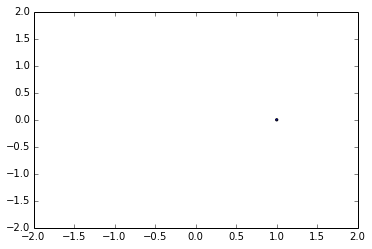

In [7]:
#Initial positions
fig = plt.figure()
ax=fig.add_axes([0.1,0.1,0.75,0.75])
world = ax.scatter(px,py,marker='.')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
hx=[px[0],]
hy=[py[0],]

Integrate forward 20$\pi$ timesteps, and then plot the trajectory!

(-2, 2)

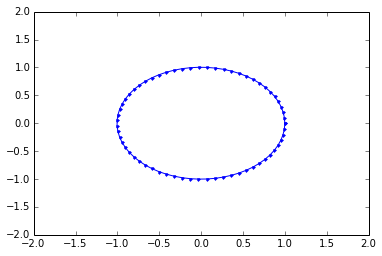

In [8]:
t=0
while t<20*np.pi:
    i=0
    while i<len(px):
        px[i],py[i],pvx[i],pvy[i] = leapfrog(px,py,pvx,pvy,DT)
        hx.append(px[i])
        hy.append(py[i])
        i+=1
    t+=1
plt.plot(hx,hy,marker='.')
plt.xlim(-2,2)
plt.ylim(-2,2)